In [147]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [148]:
data16=pd.read_excel("AQI 2016 (1).xls")

In [149]:
data17=pd.read_excel("AQI 2017.xlsx")

In [150]:
data18=pd.read_excel("2018_AQI.xlsx")

In [151]:
data19=pd.read_excel("2019_AQI.xlsx")

In [152]:
data20=pd.read_excel("2020_AQI.xlsx")

In [153]:
data21=pd.read_excel("2021_AQI.xlsx")

In [154]:
data22=pd.read_excel("2022_AQI.xlsx")

In [155]:
data22

,Location,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Nizamabad,56,59.000000,64.000000,58.000000,56.222222,54,46.000000,53,54,63,56,59
1,Adilabad,54,55.000000,56.000000,65.000000,60.148148,58,48.000000,56,56,65,58,62
2,"Kuda, warangal",58,64.000000,49.105826,66.173930,53.704530,72,40.428571,43,41,64,49,116
3,"Mee-Seva, Warangal",73,72.514053,76.057747,60.080031,77.094650,85,47.268637,56,48,64,94,94
4,Karimnagar,82,90.333333,95.666667,69.926215,76.241282,89,69.197791,55,58,63,101,126
5,Khammam,80,78.079300,76.518519,79.365731,76.611111,81,72.500000,58,42,57,78,115


# Dataset of Khammam

In [156]:
Kuda_Warangal_data=list(data16.T[2][1:-6])+list(data17.T[2][1:-1])+list(data18.T[2][1:])+list(data19.T[2][1:])+list(data20.T[2][1:])+list(data21.T[2][1:])+list(data22.T[2][1:])

dt=Kuda_Warangal_data

dt

[73.33333333333333,
 72.22222222222223,
 67.66666666666667,
 73.51851851851852,
 75.88888888888889,
 72.16666666666667,
 56.875,
 43.708333333333336,
 47.857142857142854,
 62.0,
 55.75,
 83,
 73.0,
 69.8888888888889,
 65.03703703703704,
 73.51851851851852,
 71.07407407407408,
 62.66666666666666,
 58.55555555555556,
 56.14583333333333,
 67.66666666666667,
 58.72222222222222,
 65.03703703703704,
 69.62962962962962,
 116.555555555556,
 91.0,
 79.9635037472106,
 81.6426261862769,
 84.2218113959232,
 85.5554912253191,
 72.8308115245476,
 78.6388888888889,
 80.7476827322677,
 85.713697824809,
 95.6666666666667,
 86,
 88.1851851851852,
 90.2962962962963,
 90.4074074074074,
 94.0746619635509,
 92.1481481481481,
 88.1666666666667,
 89.1481481481482,
 81.7291666666667,
 75.5416666666667,
 91.0,
 87.5555555555556,
 90.1851851851852,
 91.5185185185185,
 88.0,
 65.0,
 38.0,
 41,
 42.1111111111111,
 57,
 67.25,
 51,
 59,
 85.3333333333333,
 59.4444444444444,
 78.2222222222222,
 85,
 57,
 58,
 43,
 4

In [157]:
L=['1-1-2016','1-2-2016','1-3-2016','1-4-2016','1-5-2016','1-6-2016','1-7-2016','1-8-2016','1-9-2016','1-10-2016','1-11-2016','1-12-2016','1-1-2017','1-2-2017','1-3-2017','1-4-2017','1-5-2017','1-6-2017','1-7-2017','1-8-2017','1-9-2017','1-10-2017','1-11-2017','1-12-2017']
L=L+['1-1-2018','1-2-2018','1-3-2018','1-4-2018','1-5-2018','1-6-2018','1-7-2018','1-8-2018','1-9-2018','1-10-2018','1-11-2018','1-12-2018']
L=L+['1-1-2019','1-2-2019','1-3-2019','1-4-2019','1-5-2019','1-6-2019','1-7-2019','1-8-2019','1-9-2019','1-10-2019','1-11-2019','1-12-2019']
L=L+['1-1-2020','1-2-2020','1-3-2020','1-4-2020','1-5-2020','1-6-2020','1-7-2020','1-8-2020','1-9-2020','1-10-2020','1-11-2020','1-12-2020']
L=L+['1-1-2021','1-2-2021','1-3-2021','1-4-2021','1-5-2021','1-6-2021','1-7-2021','1-8-2021','1-9-2021','1-10-2021','1-11-2021','1-12-2021']
L=L+['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
L

['1-1-2016',
 '1-2-2016',
 '1-3-2016',
 '1-4-2016',
 '1-5-2016',
 '1-6-2016',
 '1-7-2016',
 '1-8-2016',
 '1-9-2016',
 '1-10-2016',
 '1-11-2016',
 '1-12-2016',
 '1-1-2017',
 '1-2-2017',
 '1-3-2017',
 '1-4-2017',
 '1-5-2017',
 '1-6-2017',
 '1-7-2017',
 '1-8-2017',
 '1-9-2017',
 '1-10-2017',
 '1-11-2017',
 '1-12-2017',
 '1-1-2018',
 '1-2-2018',
 '1-3-2018',
 '1-4-2018',
 '1-5-2018',
 '1-6-2018',
 '1-7-2018',
 '1-8-2018',
 '1-9-2018',
 '1-10-2018',
 '1-11-2018',
 '1-12-2018',
 '1-1-2019',
 '1-2-2019',
 '1-3-2019',
 '1-4-2019',
 '1-5-2019',
 '1-6-2019',
 '1-7-2019',
 '1-8-2019',
 '1-9-2019',
 '1-10-2019',
 '1-11-2019',
 '1-12-2019',
 '1-1-2020',
 '1-2-2020',
 '1-3-2020',
 '1-4-2020',
 '1-5-2020',
 '1-6-2020',
 '1-7-2020',
 '1-8-2020',
 '1-9-2020',
 '1-10-2020',
 '1-11-2020',
 '1-12-2020',
 '1-1-2021',
 '1-2-2021',
 '1-3-2021',
 '1-4-2021',
 '1-5-2021',
 '1-6-2021',
 '1-7-2021',
 '1-8-2021',
 '1-9-2021',
 '1-10-2021',
 '1-11-2021',
 '1-12-2021',
 '1-1-2022',
 '1-2-2022',
 '1-3-2022',
 '1-4-2

In [158]:
df=pd.DataFrame()
df.reset_index()
df["Date"]=L
df["AQI"]=dt
df

,Date,AQI
0,1-1-2016,73.333333
1,1-2-2016,72.222222
2,1-3-2016,67.666667
3,1-4-2016,73.518519
4,1-5-2016,75.888889
...,...,...
79,1-8-2022,43.000000
80,1-9-2022,41.000000
81,1-10-2022,64.000000
82,1-11-2022,49.000000


In [159]:
df1=df[["Date","AQI"]]
df1['Date'] = pd.to_datetime(df1['Date'], format='%m-%d-%Y').dt.strftime('%d-%Y')

df["Date"]=pd.to_datetime(df["Date"])
print(df1)
x=df["Date"]
y=df["AQI"]
#plt.plot(x,y)
df=df.set_index("Date")

       Date         AQI
0   01-2016   73.333333
1   02-2016   72.222222
2   03-2016   67.666667
3   04-2016   73.518519
4   05-2016   75.888889
..      ...         ...
79  08-2022   43.000000
80  09-2022   41.000000
81  10-2022   64.000000
82  11-2022   49.000000
83  12-2022  116.000000

[84 rows x 2 columns]


In [160]:
df1

,Date,AQI
0,01-2016,73.333333
1,02-2016,72.222222
2,03-2016,67.666667
3,04-2016,73.518519
4,05-2016,75.888889
...,...,...
79,08-2022,43.000000
80,09-2022,41.000000
81,10-2022,64.000000
82,11-2022,49.000000


In [161]:
df1["Date"]

0     01-2016
1     02-2016
2     03-2016
3     04-2016
4     05-2016
       ...   
79    08-2022
80    09-2022
81    10-2022
82    11-2022
83    12-2022
Name: Date, Length: 84, dtype: object

# AQI levels of Warangal(Kuda) between 2016 and 2022

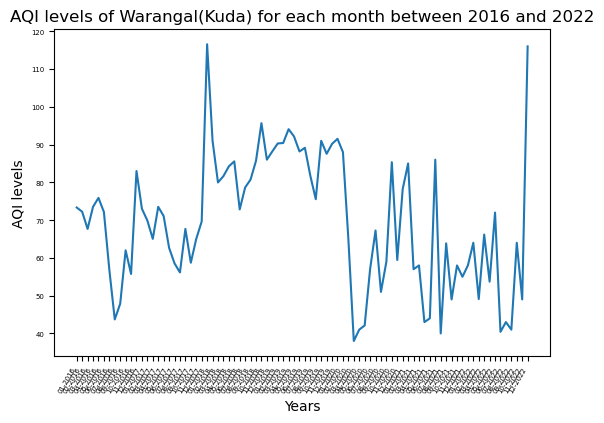

In [162]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],df1["AQI"], marker='', linestyle='-')

fig.autofmt_xdate()


plt.title("AQI levels of Warangal(Kuda) for each month between 2016 and 2022")
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(5)
plt.show()

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=666)

In [164]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(df)
print("The p-value of the dataset is",dfa[1])

The p-value of the dataset is 0.036363042295437444


In [165]:
#plt.plot(df)

In [166]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(df["AQI"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=695.775, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=723.295, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=696.447, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=708.829, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=958.418, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=694.011, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=696.128, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=694.548, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=695.549, Time=0.31 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=696.141, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=694.123, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=697.694, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=705.145, Time=0.11 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.965 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -342.005
Date:                Sat, 04 Mar 2023   AIC                            694.011
Time:                        18:40:09   BIC                            706.165
Sample:                             0   HQIC                           698.897
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     29.2068     15.149      1.928      0.054      -0.484      58.898
ar.L1          0.5859      0.222      2.639      0.008       0.151       1.021
ma.L1         -0.1624      0.203     -0.799      0.424      -0.561       0.236
ma.L2          0.2518      0.139      1.812      0.070      -0.021       0.524
sigma2       200.0425     26.200      7.635      0.000     148.691     251.394
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                31.79
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                             0.78
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
'''df.sort_index(inplace=True)
df'''

'df.sort_index(inplace=True)\ndf'

In [168]:
train=df.iloc[:-12]
test=df.iloc[-12:]

# ARIMA model

In [169]:
from statsmodels.tsa.arima.model import ARIMA 
print(train)
model =ARIMA(train,order=(1,0,2),seasonal_order=(2,0,2,12))
model_fit =model.fit()
model_fit.summary()

                  AQI
Date                 
2016-01-01  73.333333
2016-01-02  72.222222
2016-01-03  67.666667
2016-01-04  73.518519
2016-01-05  75.888889
...               ...
2021-01-08  40.000000
2021-01-09  63.854753
2021-01-10  49.000000
2021-01-11  58.000000
2021-01-12  55.000000

[72 rows x 1 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              AQI   No. Observations:                   72
Model:             ARIMA(1, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -285.365
Date:                          Sat, 04 Mar 2023   AIC                            588.729
Time:                                  18:40:10   BIC                            609.219
Sample:                                       0   HQIC                           596.886
                                           - 72                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.9635      7.475      9.225      0.000      54.312      83.615
ar.L1          0.7310      0.229      3.194      0.001       0.282       1.180
ma.L1         -0.2758      0.227     -1.216      0.224      -0.720       0.169
ma.L2          0.1353      0.190      0.711      0.477      -0.238       0.509
ar.S.L12       0.8449      1.771      0.477      0.633      -2.627       4.316
ar.S.L24      -0.8014      1.390     -0.576      0.564      -3.526       1.923
ma.S.L12      -0.7033      1.948     -0.361      0.718      -4.521       3.115
ma.S.L24       0.8378      1.794      0.467      0.640      -2.678       4.354
sigma2       152.7996     87.001      1.756      0.079     -17.719     323.318
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.50
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.85   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

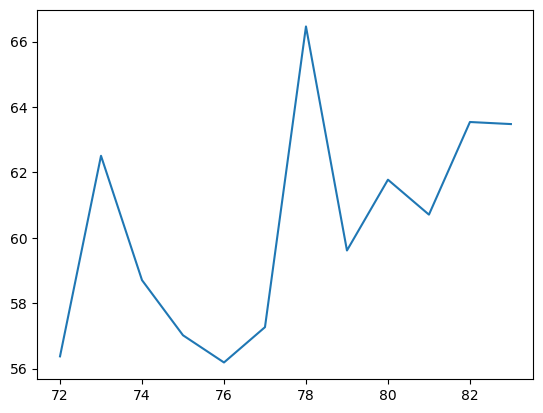

In [170]:
pred_new=model_fit.forecast(12)
plt.plot(pred_new)

In [171]:
#res.index

In [172]:
time_list=['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
res=pd.DataFrame(pred_new)
res["Date"]=time_list
a=list(res['predicted_mean'])
res["AQI"]=a
res=res.drop(["predicted_mean"],axis=1)
res["Date"]=pd.to_datetime(res["Date"])
df2=res[["Date","AQI"]]
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")

In [173]:
final_data =train
pred_data=final_data.append(res)

In [174]:
#df2

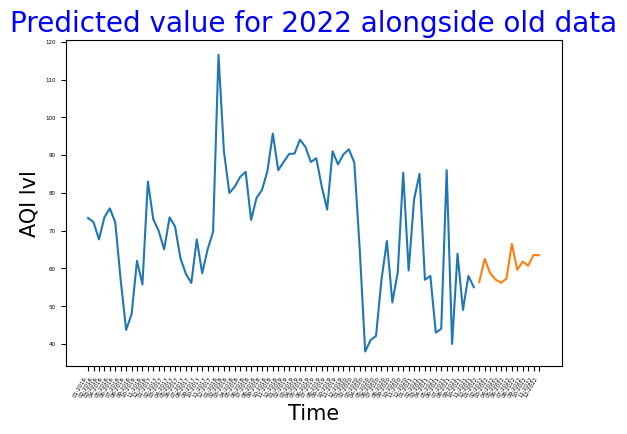

In [181]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"][:-12],df1["AQI"][:-12], marker='', linestyle='-')
ax.plot_date(df2["Date"],df2["AQI"] ,marker='', linestyle='-')
fig.autofmt_xdate()


plt.title("Predicted value for 2022 alongside old data",fontsize = 20,c='b')
plt.xlabel("Time",fontsize = 15)
plt.ylabel("AQI lvl",fontsize = 15)

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()



# Performance of the model

In [176]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_new,test["AQI"]))
ame=mean_absolute_error(pred_new,test["AQI"])

print("Average Temperature         : ",df['AQI'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  69.64346388060868
Root mean Square value      :  19.938077345421807
Mean absolute Error         :  14.405563922655615


# Forcasting for 2023

In [177]:
model =ARIMA(df,order=(1,0,2),seasonal_order=(2,0,2,12))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              AQI   No. Observations:                   84
Model:             ARIMA(1, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -340.205
Date:                          Sat, 04 Mar 2023   AIC                            698.410
Time:                                  18:40:12   BIC                            720.287
Sample:                                       0   HQIC                           707.204
                                           - 84                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.7909      3.758     19.103      0.000      64.425      79.157
ar.L1          0.3857      0.369      1.046      0.295      -0.337       1.108
ma.L1          0.0117      0.331      0.035      0.972      -0.637       0.661
ma.L2          0.3612      0.185      1.956      0.050      -0.001       0.723
ar.S.L12       0.9698      0.632      1.534      0.125      -0.269       2.209
ar.S.L24      -0.9820      0.742     -1.323      0.186      -2.437       0.473
ma.S.L12      -0.9161      1.135     -0.807      0.420      -3.140       1.308
ma.S.L24       0.9012      2.124      0.424      0.671      -3.262       5.064
sigma2       170.4785    237.440      0.718      0.473    -294.895     635.852
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.46
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                             0.69
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
pred_new =model_fit.forecast(12)
print("The predicted AQI values of each month of 2023 is:\n",pd.DataFrame(pred_new))

The predicted AQI values of each month of 2023 is:
     predicted_mean
84       84.966830
85       90.580677
86       79.141764
87       80.547937
88       78.268301
89       77.706778
90       66.802083
91       68.835345
92       71.635128
93       72.216424
94       67.712096
95       78.400106


In [179]:
res=pd.DataFrame(pred_new)
res.columns=["AQI"]
time_list=['1-1-2023','1-2-2023','1-3-2023','1-4-2023','1-5-2023','1-6-2023','1-7-2023','1-8-2023','1-9-2023','1-10-2023','1-11-2023','1-12-2023']
res["AQI"]=pred_new
res["Date"]=time_list
res["Date"]=pd.to_datetime(res["Date"])
res['Date'] = pd.to_datetime(res['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")
res

,AQI
Date,
01-2023,84.966830
02-2023,90.580677
03-2023,79.141764
04-2023,80.547937
05-2023,78.268301
06-2023,77.706778
07-2023,66.802083
08-2023,68.835345
09-2023,71.635128


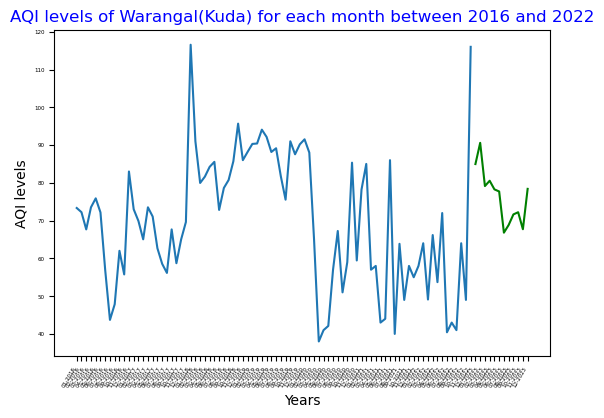

In [180]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],y, marker='', linestyle='-')
plt.plot(res,c='g')

fig.autofmt_xdate()


plt.title("AQI levels of Warangal(Kuda) for each month between 2016 and 2022",c='b')
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()
